# Used Car Price Prediction

#### I have taken this data Set from kaggle.
#### Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as location, km driven, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

#### Here we will import numpy, pandas and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Try to install it
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\harsh\Desktop\ml_projects\car_price_pred\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.6-pyhd8ed1ab_0 
  seaborn            conda-forge/noarch::seaborn-0.13.2-hd8ed1ab_2 
  seaborn-base       conda-forge/noarch::seaborn-base-0.13.2-pyhd8ed1ab_2 
  statsmodels        conda-forge/win-64::statsmodels-0.14.2-py312h1a27103_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns

### Read the train and test data using pandas

In [6]:
train_data = pd.read_csv("train-data.csv", index_col=0)

In [7]:
test_data = pd.read_csv("test-data.csv", index_col=0)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [9]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
# Get the top 5 records from train_data
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
# Get the last 5 records from train_data
train_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [12]:
train_data.shape

(6019, 13)

In [13]:
train_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [14]:
train_data["Kilometers_Driven"].value_counts()

Kilometers_Driven
60000     82
45000     70
65000     68
50000     61
70000     60
          ..
16542      1
95980      1
121812     1
39300      1
40670      1
Name: count, Length: 3093, dtype: int64

### We will see the unique values of some of the attributes of data we have

In [15]:
print(train_data["Location"].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [16]:
print(train_data["Fuel_Type"].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [17]:
print(train_data["Transmission"].unique())

['Manual' 'Automatic']


In [18]:
print(train_data["Owner_Type"].unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [19]:
print(train_data["Seats"].unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]


### We should figure out in which columns we have NULL values

In [20]:
train_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [21]:
train_data.shape

(6019, 13)

In [22]:
# Create a function to remove rows wherever any Null values are present
def remove_Null(df, col_name):
    return df.dropna(subset=[col_name])

In [23]:
# We will drop the Milege NULL rows
train_data = remove_Null(train_data, "Mileage")

In [24]:
# We should get 6017 records i.e 6019-2
train_data.shape

(6017, 13)

In [25]:
train_data = remove_Null(train_data, "Engine")

In [26]:
train_data.shape

(5981, 13)

In [27]:
train_data = remove_Null(train_data, "Power")

In [28]:
train_data.shape

(5981, 13)

In [29]:
train_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   6
New_Price            5158
Price                   0
dtype: int64

In [30]:
# We have only 6 NULL values for Seats.
# Its better to fill it by some value because we have a very less no of rows for NULL value.
# And other attributes may be more important than Seats.
#So we will fill it by that value of the seats which are present in most of the cars
train_data["Seats"].value_counts()

Seats
5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [31]:
# So we will fill NULL values of Seats by 5
train_data["Seats"] = train_data["Seats"].fillna(5)

In [32]:
train_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5158
Price                   0
dtype: int64

In [33]:
train_data.shape

(5981, 13)

#### In total we have 5981 columns
### We have removed some of the columns and we should reset the index 

In [34]:
train_data = train_data.reset_index(drop=True)

In [35]:
train_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5976,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5977,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5978,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5979,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
5980,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


#### You can see above that we have index upto 5980 i.e, 5981 rows of data which means index has been reset

In [36]:
# Gives the no of rows
train_data.shape[0]

5981

### We know that the `name` column has Complete name of vehicle. We should extract the `company` name from it.
### We should extract only the numerical value out of `Mileage`, `Power`, `Engine`, because it has value with text
### Also we are going to convert them to float data type

In [37]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(KMPL)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(BHP)'] = train_data['Power'][i].split()[0]

In [38]:
train_data['Mileage(KMPL)'] = train_data['Mileage(KMPL)'].astype(float)

In [39]:
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [40]:
train_data['Power(BHP)'] = train_data['Power(BHP)'].astype(float)

ValueError: could not convert string to float: 'null'

In [41]:
# there are some null values in power column, so we should remove it before making it a float data type
position = []
count = 0
for i in range(train_data.shape[0]):
    if train_data['Power(BHP)'][i] == 'null':
        position.append(i)
        count+=1
print(f"The total number of null values in Power(BHP) is: {count}")
print(position)

The total number of null values in Power(BHP) is: 107
[76, 79, 89, 120, 143, 225, 243, 260, 305, 306, 384, 422, 426, 441, 470, 573, 629, 645, 646, 736, 745, 825, 911, 922, 930, 1064, 1139, 1149, 1267, 1314, 1339, 1381, 1412, 1547, 1570, 1641, 1664, 1849, 1991, 2045, 2120, 2154, 2252, 2256, 2294, 2330, 2356, 2380, 2428, 2437, 2484, 2488, 2514, 2564, 2582, 2619, 2624, 2871, 3013, 3041, 3084, 3169, 3227, 3269, 3417, 3494, 3509, 3565, 3604, 3614, 3621, 3645, 3709, 3776, 3857, 3873, 3905, 3974, 4051, 4054, 4323, 4326, 4598, 4677, 4681, 4711, 4797, 4853, 4867, 4919, 5029, 5083, 5191, 5388, 5400, 5420, 5491, 5495, 5609, 5717, 5721, 5823, 5835, 5855, 5887, 5905, 5947]


In [42]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [43]:
train_data.shape

(5874, 17)

In [44]:
train_data['Power(BHP)'] = train_data['Power(BHP)'].astype(float)

In [45]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(KMPL),Engine(CC),Power(BHP)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [46]:
# In New_Price column, wherever data is present, we have Lakhs written after the number. Remove it
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i, 'New_Price'])==False:
        train_data.at[i, 'New_Car_Price'] = train_data['New_Price'][i].split()[0]

In [47]:
train_data['New_Car_Price'] = train_data['New_Car_Price'].astype(float)

#### Delete all the previous columns which are unwanted

In [48]:
train_data.drop(['Name'], axis=1, inplace=True)
train_data.drop(['Mileage'], axis=1, inplace=True)
train_data.drop(['Power'], axis=1, inplace=True)
train_data.drop(['New_Price'], axis=1, inplace=True)
train_data.drop(['Engine'], axis=1, inplace=True)

In [49]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(KMPL),Engine(CC),Power(BHP),New_Car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [50]:
train_data.shape

(5874, 13)

### Visualization (Plotting some data to build some realtionship)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5874 non-null   object 
 1   Year               5874 non-null   int64  
 2   Kilometers_Driven  5874 non-null   int64  
 3   Fuel_Type          5874 non-null   object 
 4   Transmission       5874 non-null   object 
 5   Owner_Type         5874 non-null   object 
 6   Seats              5874 non-null   float64
 7   Price              5874 non-null   float64
 8   Company            5874 non-null   object 
 9   Mileage(KMPL)      5874 non-null   float64
 10  Engine(CC)         5874 non-null   float64
 11  Power(BHP)         5874 non-null   float64
 12  New_Car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.7+ KB


In [52]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage(KMPL),Engine(CC),Power(BHP),New_Car_Price
count,5874.000000,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,823.000000
mean,2013.476507,5.832412e+04,5.283623,9.601551,18.273829,1625.701226,113.272203,20.328906
std,3.166025,9.215466e+04,0.804961,11.248283,4.371965,601.544134,53.873317,20.209032
min,1998.000000,1.710000e+02,2.000000,0.440000,0.000000,624.000000,34.200000,1.000000
25%,2012.000000,3.343125e+04,5.000000,3.512500,15.260000,1198.000000,75.000000,7.840000
50%,2014.000000,5.262150e+04,5.000000,5.750000,18.200000,1495.500000,97.700000,11.390000
75%,2016.000000,7.240825e+04,5.000000,10.000000,21.100000,1991.000000,138.100000,24.010000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000,99.920000


In [53]:
plt.style.use("seaborn-v0_8")

[Text(0.5, 1.0, 'Car Price vs Count'),
 Text(0.5, 0, 'Price of car'),
 Text(0, 0.5, 'Count(No of cars)')]

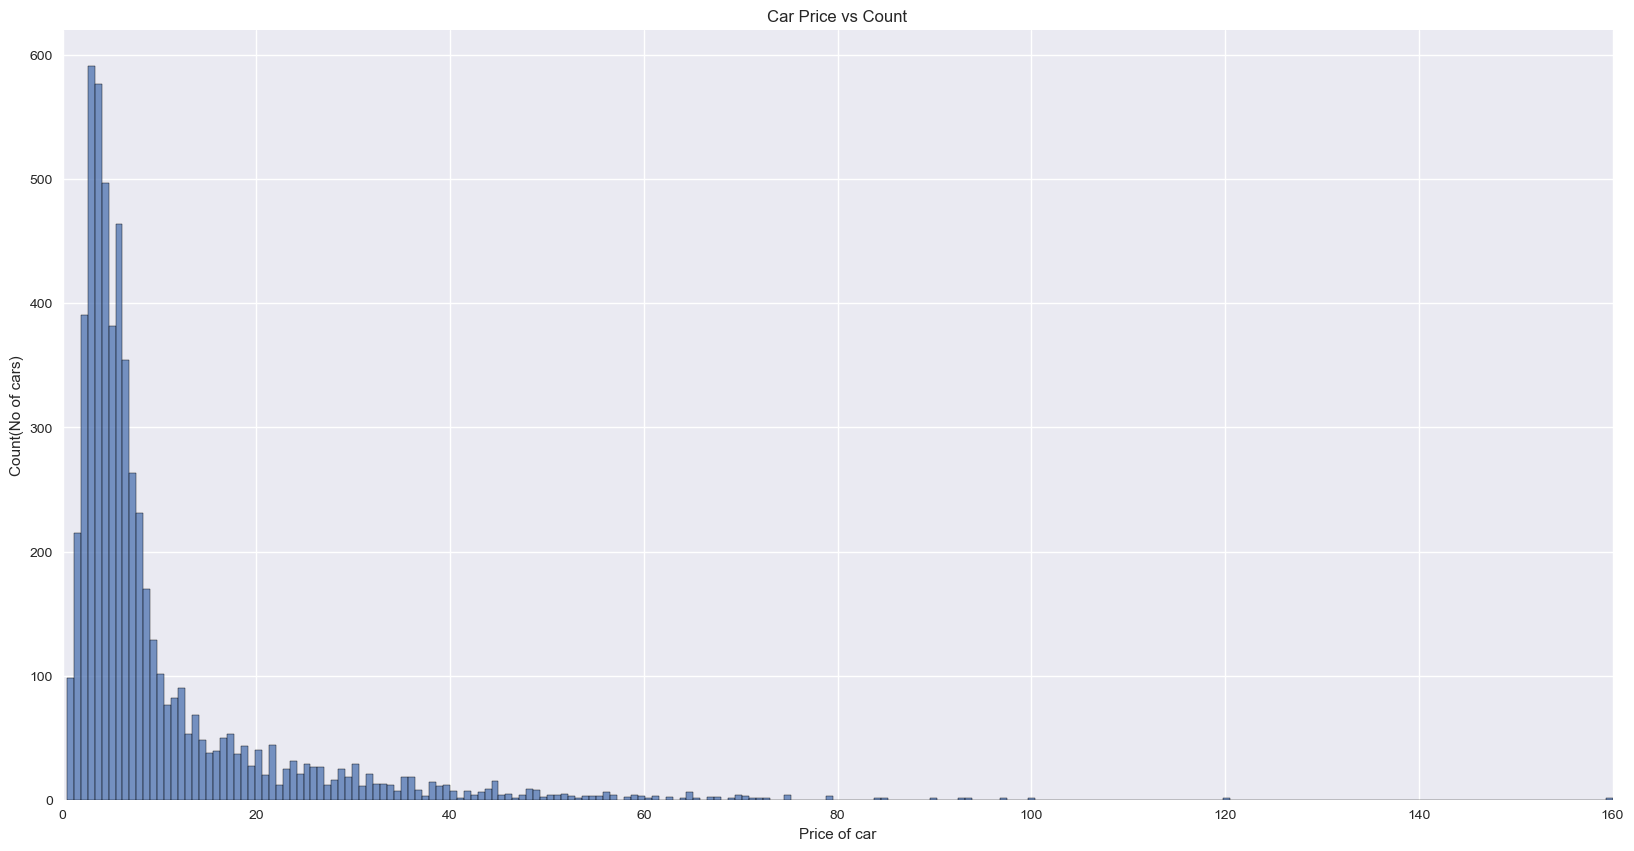

In [54]:
# Lets plot the price which is our target
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(train_data['Price'])
plt.xlim([0, 160])
ax.set(title = "Car Price vs Count", xlabel = "Price of car", ylabel = "Count(No of cars)")

#### We can see from the above plot that a large number of used cars are low priced in the range 0-12 Lakhs
#### Plotting the price vs fuel_type

[Text(0.5, 1.0, 'Fuel_Type vs Car Price'),
 Text(0.5, 0, 'Fuel Type'),
 Text(0, 0.5, 'Car Price')]

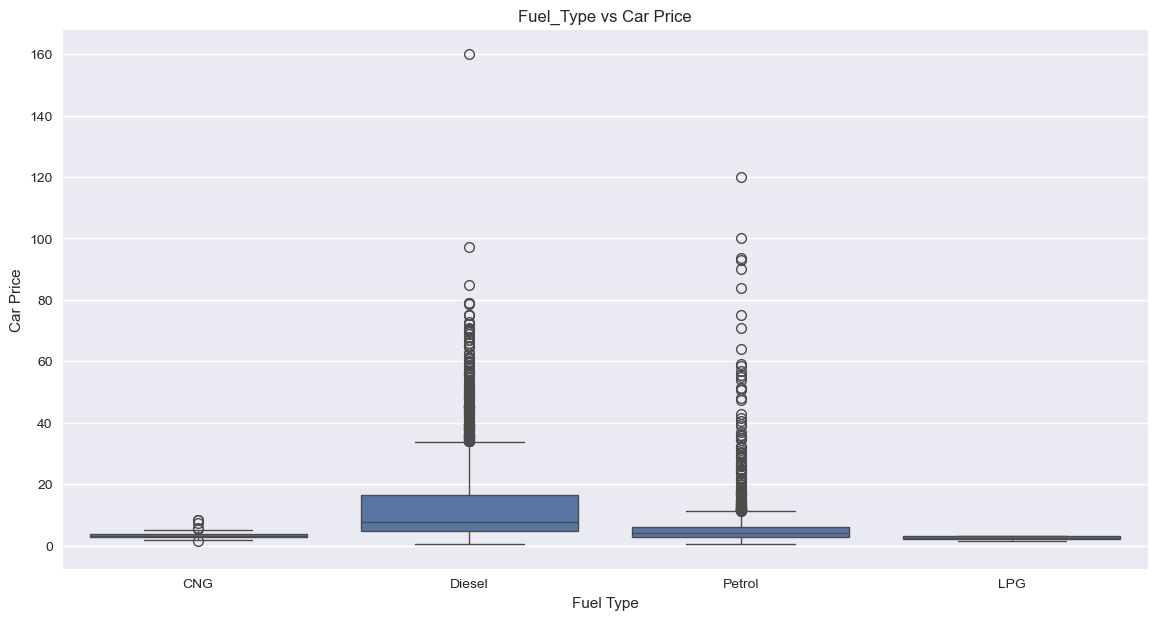

In [55]:
fig, ax = plt.subplots(figsize=(14, 7))
data = pd.concat([train_data['Price'], train_data['Fuel_Type']], axis=1)
sns.boxplot(data = data, x = 'Fuel_Type', y = 'Price')
ax.set(title = "Fuel_Type vs Car Price", xlabel = 'Fuel Type', ylabel = 'Car Price')

#### We can see that majority of the cars are of Diesel type
#### We will plot Owner Type vs Price

[Text(0.5, 1.0, 'Owner_Type vs Car Price'),
 Text(0.5, 0, 'Owner Type'),
 Text(0, 0.5, 'Car Price')]

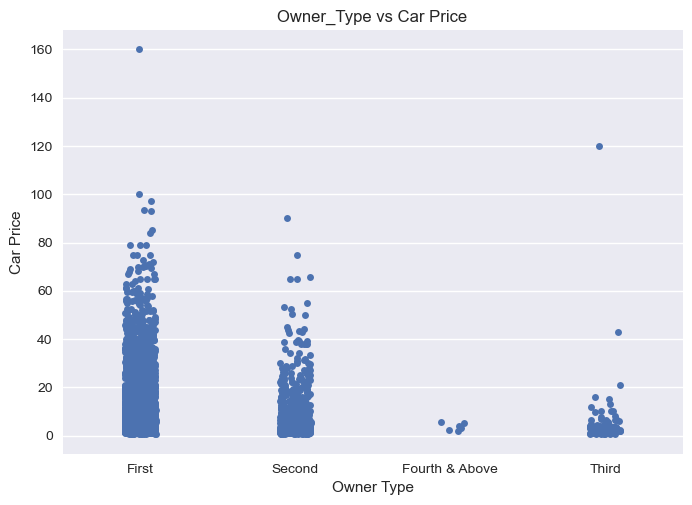

In [56]:
fig, ax = plt.subplots()
data = pd.concat([train_data['Price'], train_data['Owner_Type']], axis=1)
sns.stripplot(data = data, x = 'Owner_Type', y = 'Price')
ax.set(title = "Owner_Type vs Car Price", xlabel = 'Owner Type', ylabel = 'Car Price')

#### Cars with only one owner till now are at higher price
#### We will plot Year vs Price of car

[Text(0.5, 1.0, 'Year vs Car Price'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Car Price')]

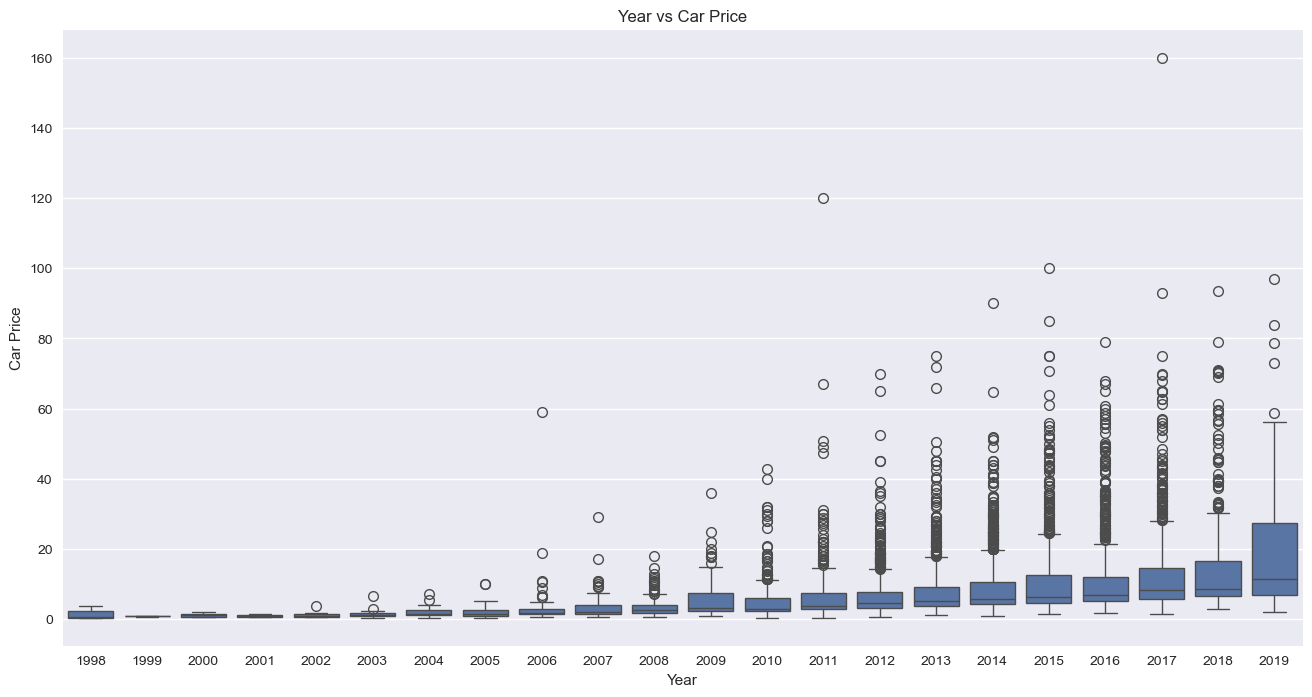

In [57]:
fig, ax = plt.subplots(figsize=(16, 8))
data = pd.concat([train_data['Price'], train_data['Year']], axis=1)
sns.boxplot(data = data, x = 'Year', y = 'Price')
ax.set(title = "Year vs Car Price", xlabel = 'Year', ylabel = 'Car Price')

#### The cars are at higher price which are newer compared to others as cars of 2019 year are at higher prices

Text(29.522762345679013, 0.5, 'Number of cars')

<Figure size 1600x800 with 0 Axes>

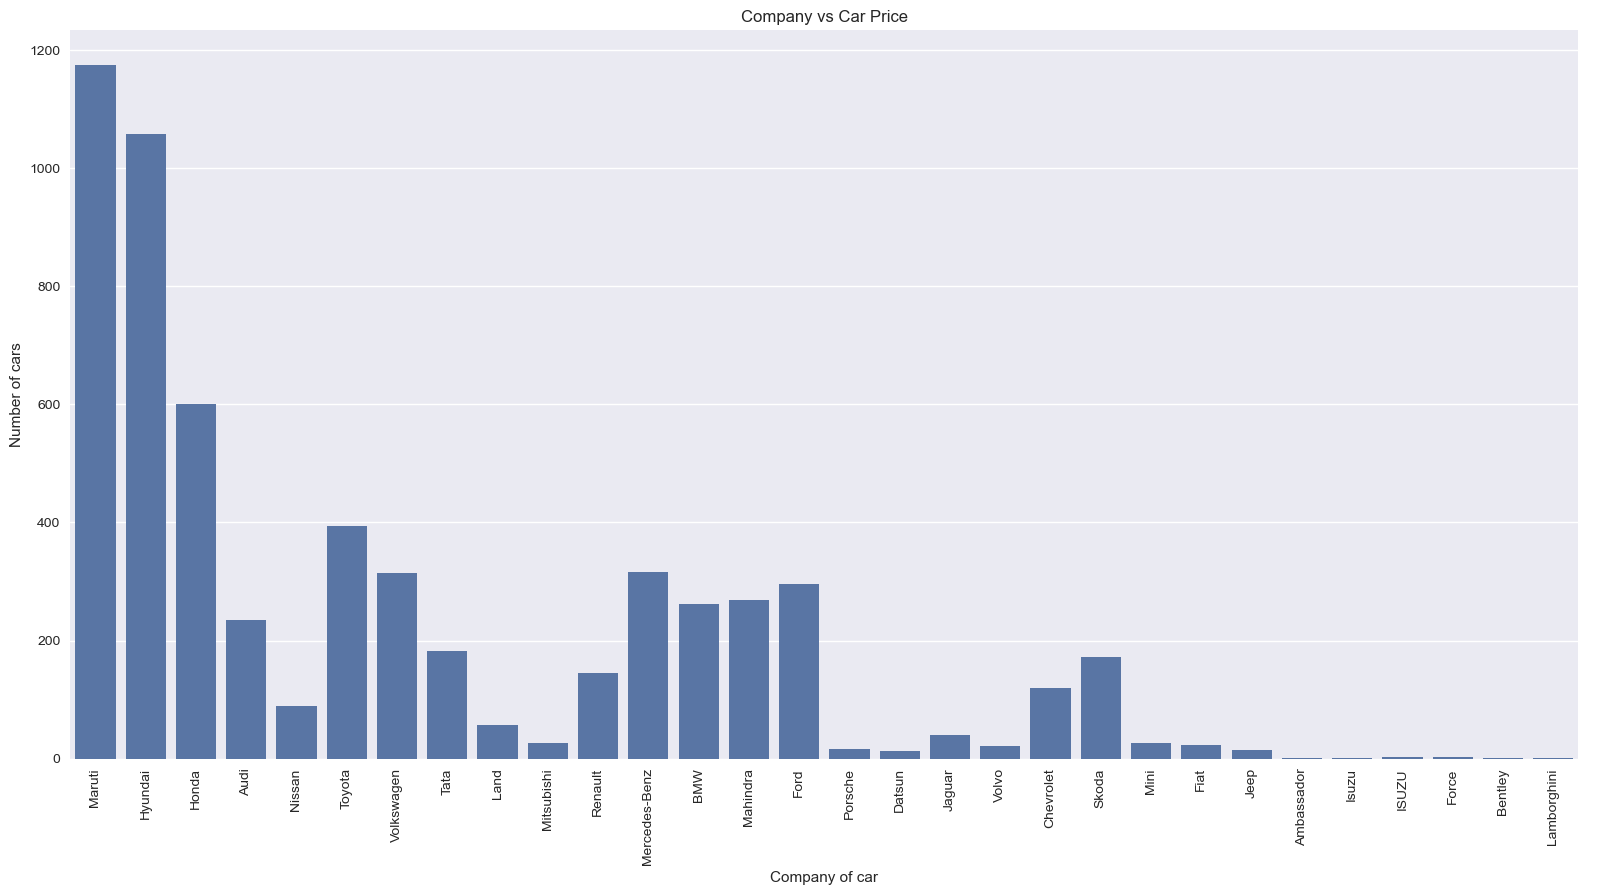

In [58]:
plt.figure(figsize=(16, 8))
sns.catplot(x = 'Company',kind='count', height=8, aspect=2, data = train_data)
plt.xticks(rotation=90)
plt.title("Company vs Car Price")
plt.xlabel('Company of car')
plt.ylabel('Number of cars')

#### So most of the cars are of Maruti company
#### We will plot Kilometres driven vs Price

(0.0, 200000.0)

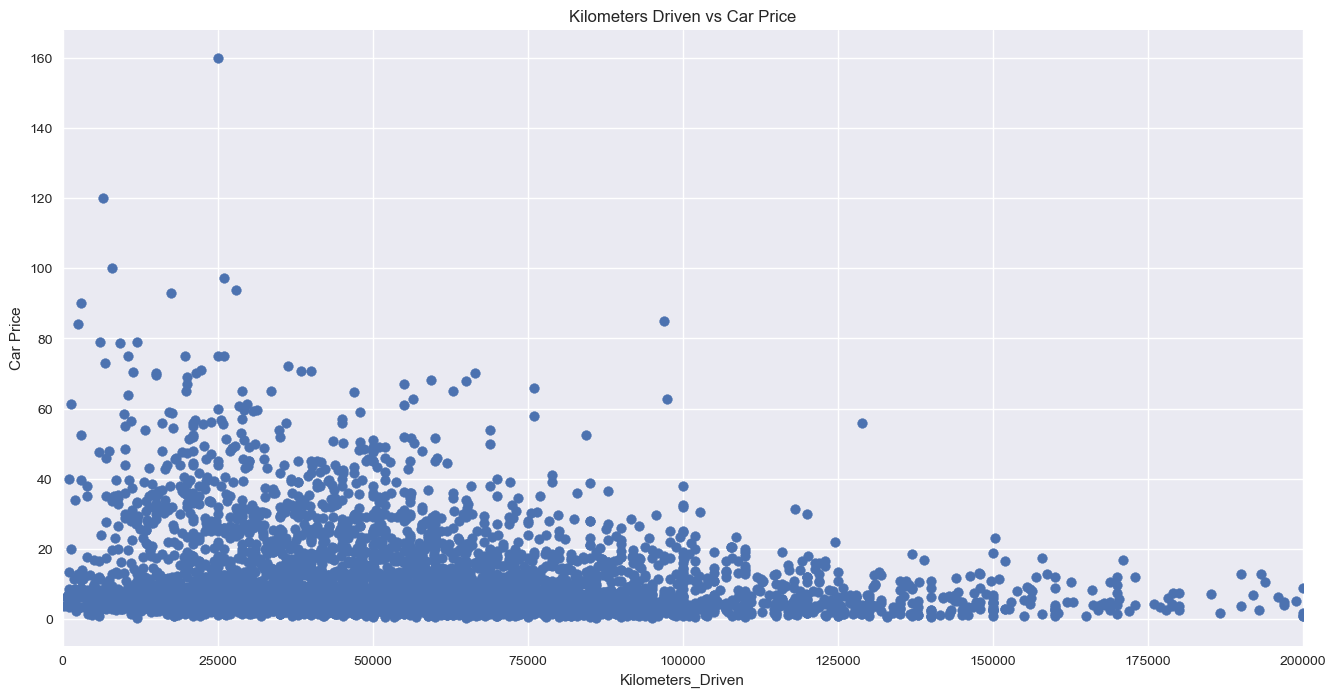

In [59]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x = train_data['Kilometers_Driven'], y = train_data['Price'])
ax.set(title = "Kilometers Driven vs Car Price", xlabel = 'Kilometers_Driven', ylabel = 'Car Price')
plt.xlim([0, 200000])

#### We can see that the car which is driven less is having higher price

### We will work on the categorical data and use one hot encoding as well as label encoding
#### we have the following categorical features:-
* Location
* Transmission
* Fuel_Type
* Company
* Owner_Type

In [60]:
train_data['Location'].describe()

count       5874
unique        11
top       Mumbai
freq         775
Name: Location, dtype: object

In [61]:
train_data['Location'].value_counts()

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        403
Bangalore     348
Ahmedabad     220
Name: count, dtype: int64

In [62]:
train_data["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3153
Petrol    2656
CNG         55
LPG         10
Name: count, dtype: int64

In [63]:
train_data["Transmission"].value_counts()

Transmission
Manual       4172
Automatic    1702
Name: count, dtype: int64

In [64]:
train_data["Company"].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             601
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              295
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [65]:
train_data['Owner_Type'].value_counts()

Owner_Type
First             4840
Second             926
Third              101
Fourth & Above       7
Name: count, dtype: int64

#### We will transform location, fuel type and transmission
#### We will drop company because there are too many variations
#### We will make Owner Type just changed to 1, 2, 3, 4 for First, Second, Third, Fourth & Above repectively

In [66]:
Location = train_data[['Location']]
Location = pd.get_dummies(Location)
Location.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [67]:
fuel_type = train_data[['Fuel_Type']]
fuel_type = pd.get_dummies(fuel_type)
fuel_type.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,True,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False


In [68]:
Transmission = train_data[['Transmission']]
Transmission = pd.get_dummies(Transmission)
Transmission.head()

,Transmission_Automatic,Transmission_Manual
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [69]:
# Replace First, Second, Third, Fourth & Above with 1, 2, 3, 4 respectively in Owner_Type column
train_data.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(KMPL),Engine(CC),Power(BHP),New_Car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [70]:
# Drop the company column
train_data = train_data.drop(['Company'], axis=1)

In [71]:
final_train = pd.concat([train_data, Location, fuel_type, Transmission], axis=1)

In [72]:
final_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(KMPL),Engine(CC),...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,False,False,True,False,True,False,False,False,False,True
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,False,False,False,True,False,True,False,False,False,True
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,False,False,False,False,False,False,False,True,False,True
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,False,False,False,False,False,True,False,False,False,True
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,Delhi,2014,27365,Diesel,Manual,1,5.0,4.75,28.40,1248.0,...,False,False,False,False,False,True,False,False,False,True
5870,Jaipur,2015,100000,Diesel,Manual,1,5.0,4.00,24.40,1120.0,...,False,False,False,False,False,True,False,False,False,True
5871,Jaipur,2012,55000,Diesel,Manual,2,8.0,2.90,14.00,2498.0,...,False,False,False,False,False,True,False,False,False,True
5872,Kolkata,2013,46000,Petrol,Manual,1,5.0,2.65,18.90,998.0,...,False,True,False,False,False,False,False,True,False,True


#### We have to drop some of the data from this table which aren't required. 
#### Location, Fuel_Type, Transmission should be removed beacuse we have already encoded all the data
#### We will also remove New_car_Price

In [73]:
final_train = final_train.drop(['Location', 'Fuel_Type', 'Transmission', 'New_Car_Price'], axis=1)

In [74]:
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(KMPL),Engine(CC),Power(BHP),Location_Ahmedabad,Location_Bangalore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,False,False,...,False,False,True,False,True,False,False,False,False,True
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,False,False,...,False,False,False,True,False,True,False,False,False,True
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,False,False,...,False,False,False,False,False,True,False,False,False,True
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,False,False,...,False,False,False,False,False,True,False,False,True,False


In [75]:
final_train.shape

(5874, 25)

In [76]:
final_train.isna().sum()

Year                      0
Kilometers_Driven         0
Owner_Type                0
Seats                     0
Price                     0
Mileage(KMPL)             0
Engine(CC)                0
Power(BHP)                0
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_LPG             0
Fuel_Type_Petrol          0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

## Similarly we will do for the test data

In [77]:
test_data.shape

(1234, 12)

In [78]:
test_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [79]:
test_data = remove_Null(test_data, "Engine")

In [80]:
test_data.shape

(1224, 12)

In [81]:
test_data = remove_Null(test_data, "Power")

In [82]:
test_data.shape

(1224, 12)

In [83]:
test_data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   1
New_Price            1042
dtype: int64

In [84]:
test_data["Seats"].value_counts()

Seats
5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: count, dtype: int64

In [85]:
#There is only one data of Seats which is Null. Fill it by the most frequent value
test_data['Seats'] = test_data['Seats'].fillna(5)

In [86]:
test_data = test_data.reset_index(drop=True)

In [87]:
for i in range(test_data.shape[0]):
    test_data.at[i, 'Company'] = test_data['Name'][i].split()[0]
    test_data.at[i, 'Mileage(KMPL)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(BHP)'] = test_data['Power'][i].split()[0]

In [88]:
test_data['Mileage(KMPL)'] = test_data['Mileage(KMPL)'].astype(float)

In [89]:
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)

In [90]:
position = []
count = 0
for i in range(test_data.shape[0]):
    if test_data['Power(BHP)'][i] == 'null':
        position.append(i)
        count+=1
print(f"The total number of null values in Power(BHP) is: {count}")
print(position)

The total number of null values in Power(BHP) is: 22
[3, 73, 121, 142, 190, 196, 258, 366, 408, 419, 425, 434, 554, 569, 603, 670, 696, 863, 868, 918, 1063, 1116]


In [91]:
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True)

In [92]:
test_data['Power(BHP)'] = test_data['Power(BHP)'].astype(float)

In [93]:
for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i, 'New_Price'])==False:
        test_data.at[i, 'New_Car_Price'] = test_data['New_Price'][i].split()[0]

In [94]:
test_data['New_Car_Price'] = test_data['New_Car_Price'].astype(float)

In [95]:
test_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Mileage'], axis=1, inplace=True)
test_data.drop(['Power'], axis=1, inplace=True)
test_data.drop(['New_Price'], axis=1, inplace=True)
test_data.drop(['Engine'], axis=1, inplace=True)

In [96]:
Location = test_data[['Location']]
Location = pd.get_dummies(Location)
Location.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,False


In [97]:
fuel_type = test_data[['Fuel_Type']]
fuel_type = pd.get_dummies(fuel_type)
fuel_type.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,True,False,False,False
1,False,False,False,True
2,False,True,False,False
3,False,False,False,True
4,False,True,False,False


In [98]:
Transmission = test_data[['Transmission']]
Transmission = pd.get_dummies(Transmission)
Transmission.head()

,Transmission_Automatic,Transmission_Manual
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [99]:
test_data.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Company,Mileage(KMPL),Engine(CC),Power(BHP),New_Car_Price
0,Delhi,2014,40929,CNG,Manual,1,4.0,Maruti,32.26,998.0,58.20,NaN
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,Maruti,24.70,796.0,47.30,NaN
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,Toyota,13.68,2393.0,147.80,25.27
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,Hyundai,18.50,1197.0,82.85,NaN
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,Mahindra,16.00,2179.0,140.00,NaN


In [100]:
test_data = test_data.drop(['Company'], axis=1)

In [101]:
final_test = pd.concat([test_data, Location, fuel_type, Transmission], axis=1)

In [102]:
final_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(KMPL),Engine(CC),Power(BHP),...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,Delhi,2014,40929,CNG,Manual,1,4.0,32.26,998.0,58.20,...,False,False,False,False,True,False,False,False,False,True
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,24.70,796.0,47.30,...,False,False,False,False,False,False,False,True,False,True
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,13.68,2393.0,147.80,...,False,False,True,False,False,True,False,False,False,True
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,18.50,1197.0,82.85,...,False,False,True,False,False,False,False,True,False,True
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,16.00,2179.0,140.00,...,False,False,False,False,False,True,False,False,False,True


In [103]:
final_test = final_test.drop(['Location', 'Fuel_Type', 'Transmission', 'New_Car_Price'], axis=1)

In [104]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(KMPL),Engine(CC),Power(BHP),Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2013,54493,2,5.0,24.70,796.0,47.30,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,2017,34000,1,7.0,13.68,2393.0,147.80,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2014,29000,1,5.0,18.50,1197.0,82.85,False,False,False,...,False,False,True,False,False,False,False,True,False,True
4,2016,85609,2,7.0,16.00,2179.0,140.00,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [105]:
final_test.shape

(1202, 24)

In [106]:
final_test.isna().sum()

Year                      0
Kilometers_Driven         0
Owner_Type                0
Seats                     0
Mileage(KMPL)             0
Engine(CC)                0
Power(BHP)                0
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_LPG             0
Fuel_Type_Petrol          0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

### We will split the final_train data into X and y

In [107]:
X = final_train.drop('Price', axis=1)
y = final_train['Price']

In [108]:
X.shape, y.shape

((5874, 24), (5874,))

### We will go for feature importance to figure out which of the features are more important.

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
feature_sel = ExtraTreesRegressor()
feature_sel.fit(X, y)

ExtraTreesRegressor()

<Axes: >

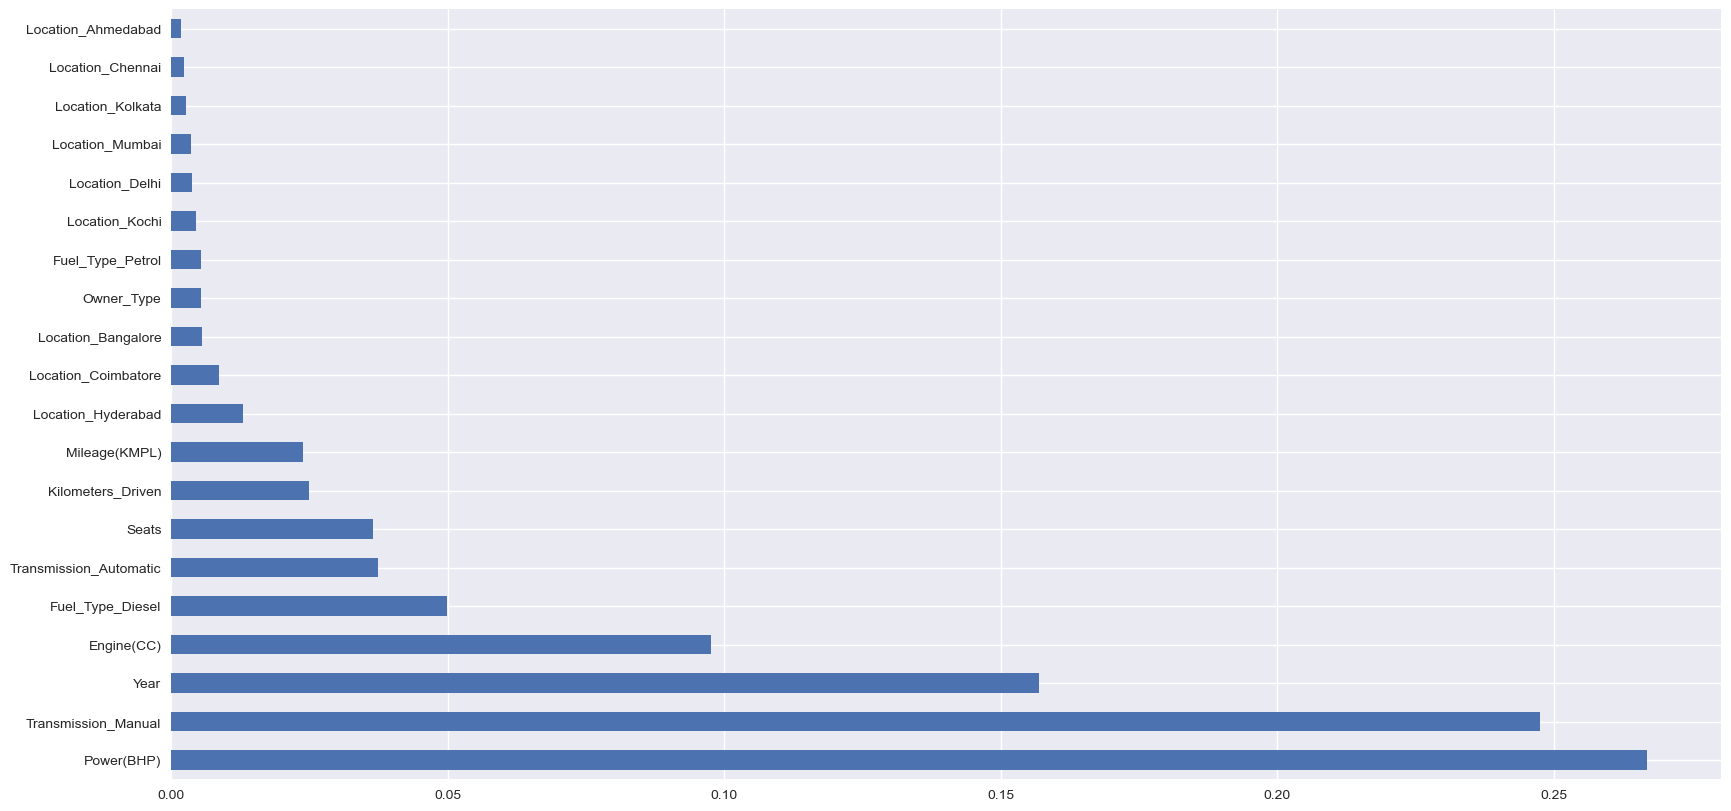

In [110]:
plt.figure(figsize=(20, 10))
feature_imp = pd.Series(feature_sel.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind = 'barh')

##  Now we will choose a right estimator for our problem

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
# We will go for Linear Regression

from sklearn.linear_model import LinearRegression
np.random.seed(42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred_LR = linear_reg.predict(X_test)
y_pred_LR

array([33.92051383,  6.75250557, 15.94820386, ..., 17.76461296,
       12.72430829,  0.54120332])

In [114]:
# The accuracy on train data
linear_reg.score(X_train, y_train)

0.694739080276644

In [115]:
# The accuracy on test data
linear_reg.score(X_test, y_test)

0.7495506517090996

In [116]:
# We will see RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
y_pred_RFR = model.predict(X_test)
y_pred_RFR

array([23.2614,  4.9611, 13.1036, ..., 12.2414, 11.122 ,  2.6834])

In [118]:
# The accuracy on train data
model.score(X_train, y_train)

0.9831278534756602

In [119]:
# The accuracy on test data
model.score(X_test, y_test)

0.9042394368789126

### We have got better accuracy in RandomForestRegressor

In [120]:
# We will find R2 score, Mean_absolute_error, Mean_squared_error, Root_mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate(y_test, y_pred):
    print(f"The R2-score is: {r2_score(y_test, y_pred)}")
    print(f"The Mean_absolute_error is: {mean_absolute_error(y_test, y_pred)}")
    print(f"The Mean_squared_error is: {mean_squared_error(y_test, y_pred)}")
    print(f"The Root_mean_squared_error is: {np.sqrt(mean_squared_error(y_test, y_pred))}")

In [121]:
evaluate(y_test, y_pred_RFR)

The R2-score is: 0.9042394368789126
The Mean_absolute_error is: 1.4818488007429924
The Mean_squared_error is: 12.774590113409591
The Root_mean_squared_error is: 3.5741558602570187


### We will try to improve our model by hyperparameter tuning

In [122]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500],
       "max_depth": [3, 5, 10, 15, 20],
       "max_features": ["sqrt", "None" "auto", "log2"],
       "min_samples_split":[1,3,6],
       "min_samples_leaf":[1,3,5]}

np.random.seed(42)

model_RS = RandomForestRegressor()
rs_Reg = RandomizedSearchCV(estimator=model_RS, param_distributions=grid, n_iter=10, cv=5, verbose=True)
rs_Reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'Noneauto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [1, 3, 6],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=True)

In [123]:
rs_Reg.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 15}

In [124]:
y_pred_RS = rs_Reg.predict(X_test)

In [125]:
evaluate(y_test, y_pred_RS)

The R2-score is: 0.8967158690024116
The Mean_absolute_error is: 1.820644133042265
The Mean_squared_error is: 13.778244359794774
The Root_mean_squared_error is: 3.7119057584743143


In [126]:
# GridSearchCV

grid2 = {"n_estimators": [100, 200], 
         "max_depth": [None, 5],
         "max_features": ["auto", "sqrt"],
         "min_samples_split": [6],
         "min_samples_leaf": [1, 3]}

from sklearn.model_selection import GridSearchCV

model_GS = RandomForestRegressor()
gs_Reg = GridSearchCV(estimator=model_GS, param_grid=grid2, cv=5, verbose=2)
gs_Reg.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3], 'min_samples_split': [6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [127]:
gs_Reg.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [128]:
y_pred_GS = gs_Reg.predict(X_test)

In [129]:
evaluate(y_test, y_pred_GS)

The R2-score is: 0.9063702211771506
The Mean_absolute_error is: 1.672859781351773
The Mean_squared_error is: 12.490340573276258
The Root_mean_squared_error is: 3.534167592697927


## We will try GradientBoostingRegressor

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)
model_GBR = GradientBoostingRegressor(n_estimators=3000)
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=3000)

In [131]:
y_pred_GBR = model_GBR.predict(X_test)

In [132]:
evaluate(y_test, y_pred_GBR)

The R2-score is: 0.9374506198042466
The Mean_absolute_error is: 1.3548279434630026
The Mean_squared_error is: 8.344172880836082
The Root_mean_squared_error is: 2.8886282005194235


In [139]:
np.random.seed(42)
grid3 = {
    "learning_rate": [0.02, 0.06, 0.2],
    "n_estimators": [1000, 2000, 5000],
    "min_samples_split": [1, 2, 6],
    "min_samples_leaf": [1, 2],
    "loss": ['squared_error']
}

models_GBR_RS = GradientBoostingRegressor()
gbr_rs = RandomizedSearchCV(estimator=models_GBR_RS, param_distributions=grid3, n_iter=10, cv=5, verbose=2)
gbr_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.06, loss=squared_error, min_samples_leaf=1, min_samples_split=1, n_estimators=2000; total time=   0.0s
[CV] END learning_rate=0.06, loss=squared_error, min_samples_leaf=1, min_samples_split=1, n_estimators=2000; total time=   0.0s
[CV] END learning_rate=0.06, loss=squared_error, min_samples_leaf=1, min_samples_split=1, n_estimators=2000; total time=   0.0s
[CV] END learning_rate=0.06, loss=squared_error, min_samples_leaf=1, min_samples_split=1, n_estimators=2000; total time=   0.0s
[CV] END learning_rate=0.06, loss=squared_error, min_samples_leaf=1, min_samples_split=1, n_estimators=2000; total time=   0.0s
[CV] END learning_rate=0.2, loss=squared_error, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  11.4s
[CV] END learning_rate=0.2, loss=squared_error, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  10.9s
[CV] END learning_rate=0.2, loss=squared_erro

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.02, 0.06, 0.2],
                                        'loss': ['squared_error'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 6],
                                        'n_estimators': [1000, 2000, 5000]},
                   verbose=2)

In [140]:
y_pred_GBR_RS = gbr_rs.predict(X_test)

In [141]:
evaluate(y_test, y_pred_GBR_RS)

The R2-score is: 0.9299990431869317
The Mean_absolute_error is: 1.3883395683080066
The Mean_squared_error is: 9.33822339476736
The Root_mean_squared_error is: 3.055850682668798


In [142]:
gbr_rs.best_params_

{'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'loss': 'squared_error',
 'learning_rate': 0.02}

## So far we have got the best results from GradientBoostingRegressor with an accuracy of 93.74%

In [145]:
# Residual errors
residual = y_test - y_pred_GBR
residual

4265    3.777409
2702   -0.430010
45     -1.591363
4535    0.281137
979     0.061829
          ...   
5450    3.108225
2214   -1.028031
1846   -1.474896
3952   -0.562246
2295    0.044983
Name: Price, Length: 1175, dtype: float64

In [146]:
dictionary = {"Y Test": y_test, "Y Predicted": y_pred_GBR, "Residual": residual}
df = pd.DataFrame(dictionary)
df.head()

,Y Test,Y Predicted,Residual
4265,23.19,19.412591,3.777409
2702,4.75,5.180010,-0.430010
45,10.11,11.701363,-1.591363
4535,8.90,8.618863,0.281137
979,3.80,3.738171,0.061829


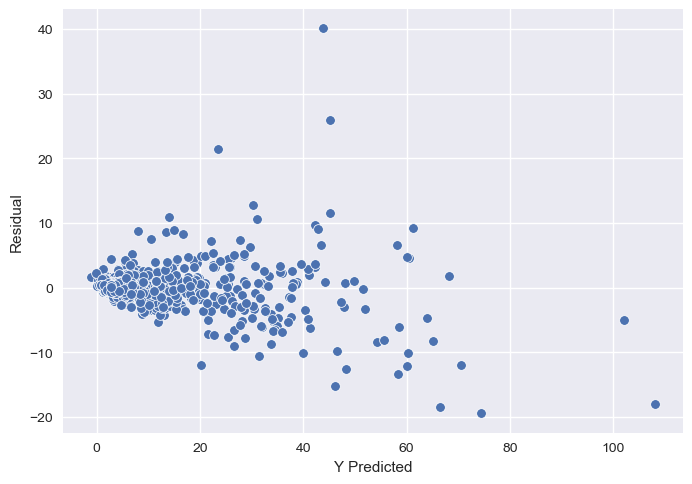

In [149]:
sns.scatterplot(data = df, x='Y Predicted', y="Residual")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

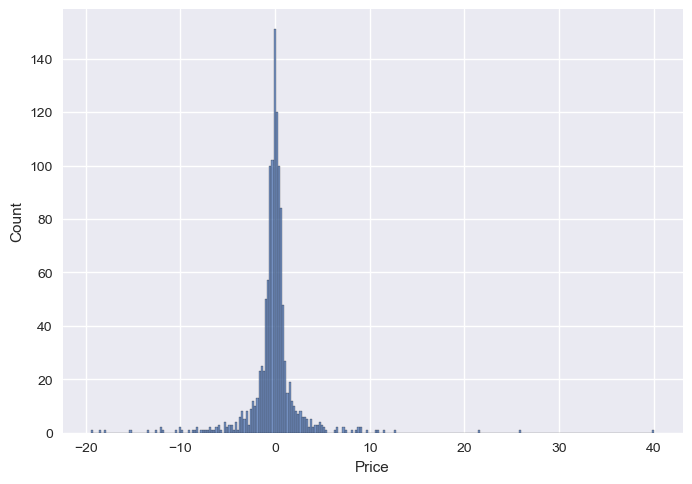

In [150]:
sns.histplot(residual)

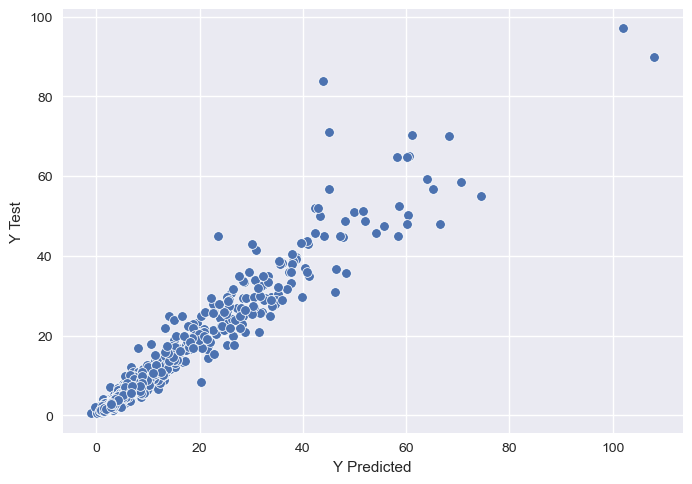

In [151]:
sns.scatterplot(data = df, x='Y Predicted', y="Y Test")
plt.show()

In [152]:
from sklearn.model_selection import cross_val_score

In [157]:
mean_score = cross_val_score(model_GBR, X, y, cv=5)

In [158]:
mean_score.mean()

np.float64(0.8994374227544342)